# 1. Import libraries

In [52]:
#standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#OLS analysis
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency
from scipy import stats

# 2. Plot colors and settings

In [53]:
#plot colors: [grey, blue, orange, green, pink, brown, purple, yellow, red]
light = ['#8c8c8c', '#88bde6', '#fbb258', '#90cd97', '#f6aac8', '#bfa454', '#bc99c7', '#eddd46', '#f07d6e']
medium = ['#4d4d4d', '#5da6da', '#faa43a', '#60bd68', '#f17cb1', '#b2912f', '#b276b2', '#dece3f', '#f15954']
dark_bright = ['#000000', '#265dab', '#df5c24', '#059749', '#e5126d', '#9d732a', '#7a3a96', '#c7b52e', '#cb2026']

#grid/rule lines: light grey
grid = ['#e0e0e0']

#plot parameters
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# 3. Load data

In [54]:
#CSVs from data_cleaning.py
df_modeling_drop_first = pd.read_csv('data_cleaning/df_modeling_drop_first.csv')
dropped_columns = pd.read_csv('data_cleaning/dropped_columns.csv')

#df from EDA for one testing linear regression assumption
df_1 = pd.read_csv('data_cleaning/df_title_loc_comp_salary.csv')
df_1 = df_1.drop('Unnamed: 0', axis=1)

In [55]:
df_modeling_drop_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 988 entries, Unnamed: 0 to Levels_Unknown
dtypes: float64(363), int64(625)
memory usage: 9.7 MB


In [56]:
df_modeling_drop_first.head()

,Unnamed: 0,Salary,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,...,"Location_West Hollywood, CA","Location_West Sacramento, CA","Location_Westlake Village, CA","Location_Woodland Hills, CA",Levels_Jr.,Levels_Lead,Levels_Principal,Levels_Sr.,Levels_Staff,Levels_Unknown
0,0,110000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,1,120000.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,3,150000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
dropped_columns

,Unnamed: 0,0
0,0,Company_23andMe
1,1,Title_Applied Scientist
2,2,Levels_Distinguished
3,3,"Location_Alameda, CA"


# 4. Data cleaning

In [58]:
df_modeling_drop_first = df_modeling_drop_first.drop('Unnamed: 0', axis=1)
dropped_columns = dropped_columns.drop('Unnamed: 0', axis=1)

In [59]:
for i in df_modeling_drop_first.columns[1:]:
    df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')

In [60]:
X_drop_first = df_modeling_drop_first.copy()
y = X_drop_first.pop('Salary')

In [61]:
X_drop_first.shape

(1287, 986)

# 5. OLS analysis

Ordinary least squares (OLS) regression fits a hyperplane to the data of the form:

$$y = X\beta + \epsilon$$

where $X$ is an $n \times p$ matrix ($n$ is the number of rows and $p$ is the number of predictors), and $\epsilon$ is the irreducible error.

The objective of OLS is to estimate the coefficients, $\beta$, which can be used to estimate $y$. The estimated $\beta$ is determined by minimizing the residual sum of squares:

$$RSS = \sum_i^{n}{(y_{i} - \hat{y_{i}})^{2}} $$

where $\hat{y}$ is the estimated response, $\hat{y} = X\hat{\beta}$, and $\hat{\beta}$ is the estimated coefficient.

With 986 predictors, using an $\alpha$ of 0.05 will result in about 49 Type I errors. Therefore, use a multiple testing technique to determine a more conservative value to reduce the number of Type I errors (at the expense of making more Type II errors).

In [62]:
X_sm = sm.add_constant(X_drop_first)
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.44
Date:                Wed, 29 Dec 2021   Prob (F-statistic):          1.63e-161
Time:                        13:18:41   Log-Likelihood:                -13127.
No. Observations:                1287   AIC:                         2.787e+04
Df Residuals:                     480   BIC:                         3.203e+04
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.721e+05   2.59e+04      6.650      0.000    1.21e+05    2.23e+05
Analysis skills                                                   1568.1528   3150.382      0.498      0.619   -4622.092    7758.397
Communication skills                                              1687.3015   4193.280      0.402      0.688   -6552.152    9926.755
Research                                                         -7264.7381   4040.328     -1.798      0.073   -1.52e+04     674.177
R                                                                -1115.9204   2956.543     -0.377      0.706   -6925.286    4693.445
Machine learning                                                 -1701.4333   2942.585     -0.578      0.563   -7483.372    4080.506
Bachelor's degree                                                -4203.0410   2530.474     -1.661      0.097   -9175.217     769.135
Master's degree                                                   5423.6759   2445.846      2.218      0.027     617.788    1.02e+04
Doctoral degree                                                  -1.154e+04   6766.282     -1.706      0.089   -2.48e+04    1752.196
Doctor of Philosophy                                              2.452e+04   7368.802      3.327      0.001       1e+04     3.9e+04
Power BI                                                          3147.2365   6989.562      0.450      0.653   -1.06e+04    1.69e+04
Relational databases                                             -1.093e+04   6961.624     -1.570      0.117   -2.46e+04    2750.452
Manufacturing                                                     4663.0619   8290.597      0.562      0.574   -1.16e+04     2.1e+04
Microsoft Excel                                                  -8833.6073   6155.664     -1.435      0.152   -2.09e+04    3261.770
Molecular biology                                                -4.811e+04   2.37e+04     -2.032      0.043   -9.46e+04   -1585.793
Product management                                               -1376.1135   5101.609     -0.270      0.787   -1.14e+04    8648.133
Usability                                                        -2.876e+04   1.74e+04     -1.656      0.098   -6.29e+04    5356.171
Natural language processing                                      -5739.1037   3278.657     -1.750      0.081   -1.22e+04     703.191
Python                                                            2326.1333   2833.827      0.821      0.412   -3242.106    7894.373
SQL                                                              -4983.2880   3546.286     -1.405      0.161    -1.2e+04    1984.874
ICD coding              

## Assessing the model

The $R^{2}$ metric shows that 96% of the variation is explained by the model. However, since there are 986 predictors, a better metric is the $adj. R^{2}$ since $R^{2}$ increases with the number of predictors and $adj. R^{2}$ penalizes additional predictors. The $R^{2}$ metric is given by:

$$R^{2} = \frac{\sum_{i}^{n}(\hat{y}_{i}-\bar{y})}{\sum_{i}^{n}(y_{i}-\bar{y})} = 1 - \frac{RSS}{TSS}$$

where $\bar{y}$ is the mean of the response variable and $TSS = \sum_i^{n}{(y_{i} - \bar{y_{i}})^{2}}$ is the total sum of squares.

The $adj. R^{2}$ metric is given by:

$$adj. R^{2} = 1 - \frac{(1-R^{2})(n-1)}{n-p-1}$$

The $adj. R^{2}$ metric shows that 89.4% of the variation is explained by this model.

Next, the model is assessed using the F-statistic and its corresponding p-value. The F-statistic is given by

$$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

If the linear model assumptions are correct then the expectation value of the denomenator is equal to $\sigma^2$ (the variance) and if the null hypothesis is true (that there is no relationship between any predictors and the response) then the expectation value of the numerator is also equal to $\sigma^2$. Hence, the further away the F-statistic is from 1, the more likely the alternative hypothesis is true.

F-statistic for this OLS model is 14.44 and the p-value is 1.63e-161. Choosing an $\alpha$ of 0.05, the null hypothesis is rejected. This means the model explains some relationship between the predictors and salary such that the relationship is statistically significant.

## Bonferroni correction

Due to the large number of predictors, a family-wise error rate (FWER) correction is used. The Bonferroni method is used due to it's simplicity and ease of use. It sets the threshold for rejecting each hypothesis test to $\alpha/p$ where $\alpha$ is 0.05 and $p$ is 986. Therefore, the probability of making a Type I error is $\leq 0.05/986 = 5.07\times 10^{-5}$.

With 986 predictors, the number of Type I errors that are expected is 0.05 (i.e., $5.07\times 10^{-5} \times 985$).

In [63]:
p_set = results.pvalues.values[1:]

reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(pvals=p_set,
                                                               method='bonferroni',
                                                               alpha=0.05, 
                                                               is_sorted=False,
                                                               returnsorted=False)

print('Total number of hypothesis tests:', len(p_set))
print('Number of null hypotheses rejected at alpha = 0.05 (i.e., without the Bonferroni correction):', sum(results.pvalues.values < 0.05))
print('Number of null hypotheses rejected with Bonferroni method:', sum(reject))
print('Threshold after FWER correction by Bonferroni method:', alphac_bonf)

Total number of hypothesis tests: 986
Number of null hypotheses rejected at alpha = 0.05 (i.e., without the Bonferroni correction): 372
Number of null hypotheses rejected with Bonferroni method: 46
Threshold after FWER correction by Bonferroni method: 5.070993914807303e-05


In [64]:
rejected_null = []

print('Variables with a rejected null hypothesis using Bonferroni method:')
for i in results.pvalues.index[1:][reject]:
    print(i)
    rejected_null.append(i)

Variables with a rejected null hypothesis using Bonferroni method:
Statistical analysis
Writing skills
Shell Scripting
Unit testing
Keras
Pre-employment physical examination
Adobe Photoshop
Linux
Cleaning
Docker
Ontology
Scripting
SSIS
Bank Secrecy Act
Cognos
Backbone.js
Project management methodology
Google Cloud Platform
Title_Data Architect
Title_Data Science Manager
Title_Director of Data Science
Title_Machine Learning Engineer
Title_Software Engineer
Company_AiCard
Company_BBI
Company_CalPrivate Bank
Company_Circle
Company_Convex Tech
Company_CooTek
Company_E. & J. Gallo Winery
Company_Evolver. LLC, a CSS Company
Company_Gayathri's Sandbox
Company_Grammarly
Company_Hurricane Electric
Company_Invitae
Company_LivePerson
Company_Sojern
Company_Spotline Inc
Company_TargetCW
Company_Teknatio
Company_Vivun
Company_Warman O'Brien
Company_iMerit
Location_Burlingame, CA
Location_Oakland, CA
Location_Pittsburg, CA


## Interpreting the OLS results

In [65]:
order = results.pvalues.index[1:][reject][pd.DataFrame(results.params.values[1:][reject]).sort_values(by=0, ascending=False).index]

In [66]:
#model baseline
dropped_columns

,0
0,Company_23andMe
1,Title_Applied Scientist
2,Levels_Distinguished
3,"Location_Alameda, CA"


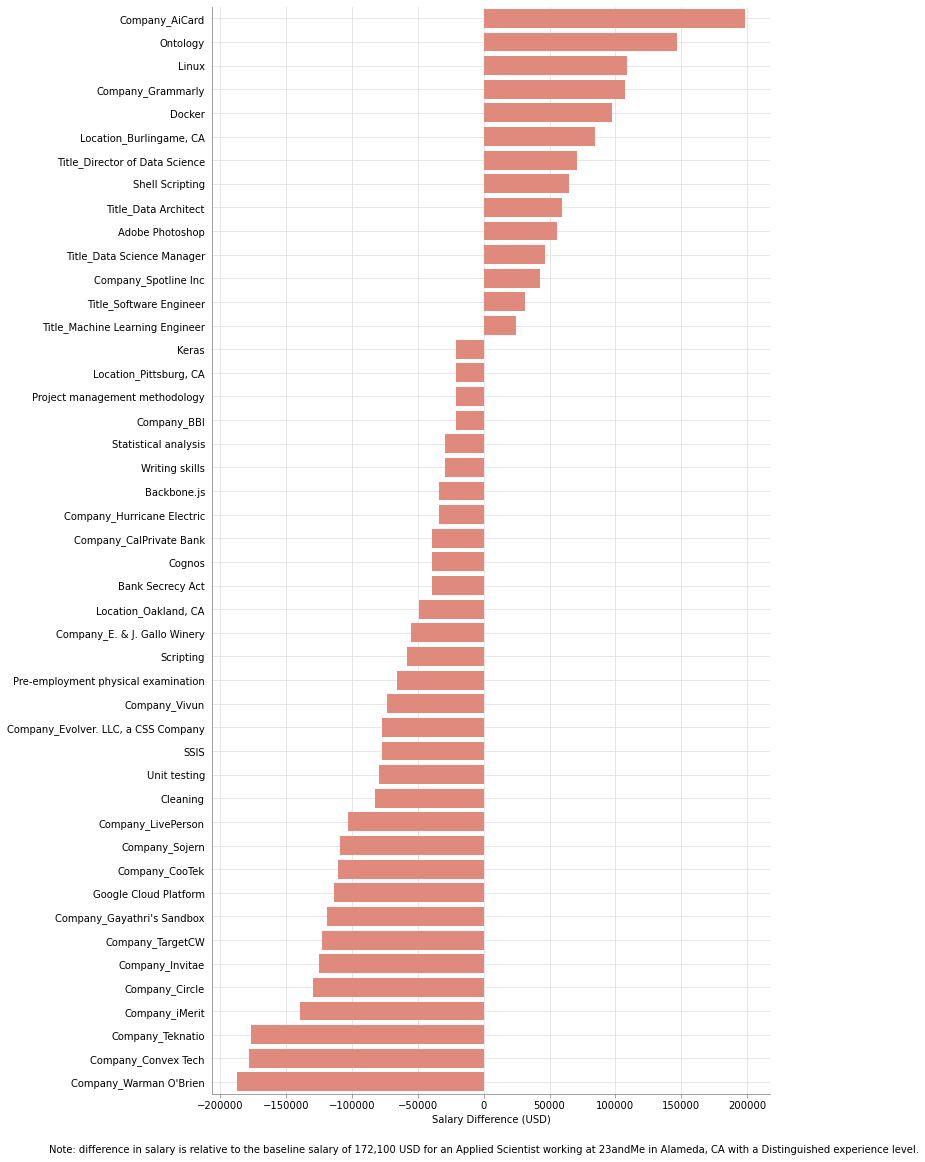

In [67]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(y=results.pvalues.index[1:][reject],x=results.params.values[1:][reject], order = order, color = light[8])
ax.set_axisbelow(True)
ax.set_xlabel('Salary Difference (USD)')
txt = 'Note: difference in salary is relative to the baseline salary of 172,100 USD for an Applied Scientist working at 23andMe in Alameda, CA with a Distinguished experience level.'
ax.text(.5, 48, txt, ha='center', color = dark_bright[0])

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none')
ax.grid(color = grid[0])

plt.show()

In [68]:
company = 0
title = 0
location = 0
levels = 0
qualifications = 0
for i in results.pvalues.index[1:][reject]:
    if 'Company' in i:
        company += 1
    elif 'Title' in i:
        title += 1
    elif 'Location' in i:
        location += 1
    elif 'Levels' in i:
        levels += 1
    else:
        qualifications += 1

print('Statistically significant predictors count:')        
print('Company: {}'.format(company))
print('Qualifications: {}'.format(qualifications))
print('Title: {}'.format(title))
print('Location: {}'.format(location))
print('Experience level: {}'.format(levels))

Statistically significant predictors count:
Company: 20
Qualifications: 18
Title: 5
Location: 3
Experience level: 0


Experience level predictors do not have a p-value that indicate statistical significance in predicting salary across California, because other predictors have a larger impact (i.e., company, location, and title). For instance, a senior level data scientist position in San Bernadino, CA and a senior level data scientist position in San Francisco, CA will have a large difference in salary regardless of seniority. Therefore, experience level is not a useful predictor for predicting salary across all of California.

## Four assumptions of OLS

The four assumptions of a linear regression model are:
1. linearity between the predictors and salary,
2. homoscedasticity (variance of the residual is constant for any observation),
3. independence of observations, and
4. normality (for any value of the predictors, salary is normally distributed).



### Homoscedasticity

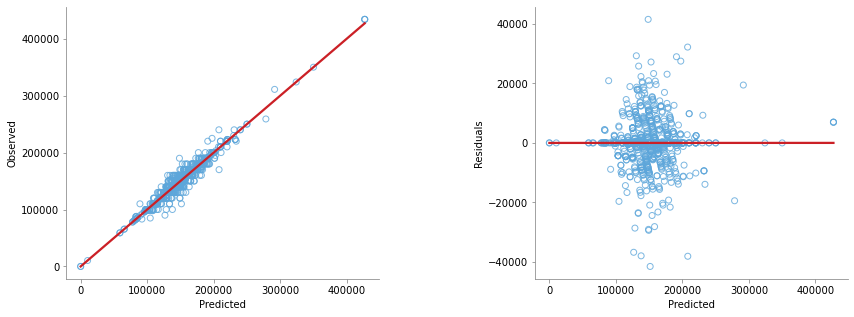

In [69]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2, figsize=(14,5))
    plt.subplots_adjust(hspace = 0.25, wspace = .5)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0],
                line_kws={'color': dark_bright[8]},
                scatter_kws = {'color': medium[1], 'facecolors': 'none'})
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    ax[0].spines["bottom"].set_color(light[0])
    ax[0].spines["left"].set_color(light[0])
    ax[0].xaxis.label.set_color(dark_bright[0])
    ax[0].yaxis.label.set_color(dark_bright[0])
    ax[0].title.set_color(dark_bright[0])
    ax[0].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[0].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1],
                line_kws={'color': dark_bright[8]},
                scatter_kws = {'color': medium[1], 'facecolors': 'none'})
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    ax[1].spines["bottom"].set_color(light[0])
    ax[1].spines["left"].set_color(light[0])
    ax[1].xaxis.label.set_color(dark_bright[0])
    ax[1].yaxis.label.set_color(dark_bright[0])
    ax[1].title.set_color(dark_bright[0])
    ax[1].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[1].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    
linearity_test(results, y.astype(float))

### Collinearity among predictors

Next, perform $\chi^{2}$ tests to determine collinearity among variables. An explanation of contingency table creation and $\chi^{2}$ is given in the diagram below.

![alt text](images/chi-square-test.jpg "Chi-square test")

In [70]:
#perform chi-square tests between every variable except salary
for i in range(len(df_1.columns)-1):
    for j in range(len(df_1.columns)-1-i):
        if df_1.columns[i] == 'Salary' or df_1.columns[j+i+1] == 'Salary':
            pass
        else:
            contingency = pd.crosstab(df_1[df_1.columns[i]], df_1[df_1.columns[j+i+1]])
            stat, p, dof, expected = chi2_contingency(contingency)

            alpha = 0.05
            print('{} and {}:'.format(df_1.columns[i], df_1.columns[j+i+1]))
            print("p-value = " + str(p))
            if p <= alpha:
                print('Variables are dependent (reject H0)\n')
            else:
                print('Variables are independent (H0 holds true)\n')
    

Title and Company:
p-value = 4.1871062576112276e-126
Variables are dependent (reject H0)

Title and Location:
p-value = 3.313275575434028e-59
Variables are dependent (reject H0)

Title and Levels:
p-value = 2.906697386608136e-82
Variables are dependent (reject H0)

Company and Location:
p-value = 0.0
Variables are dependent (reject H0)

Company and Levels:
p-value = 0.013575918831914615
Variables are dependent (reject H0)

Location and Levels:
p-value = 0.0001587483525958263
Variables are dependent (reject H0)



With an $\alpha$ of 0.05, all null hypotheses are rejected (where the null hypotheses are that the variables do not depend on each other).

### Normality

Jarque-Bera test ---- statistic: 4342.2936, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.7435, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.2673, p-value: 0.0000
Anderson-Darling test ---- statistic: 140.6420, 5% critical value: 0.7850
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


C:\Users\malex\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


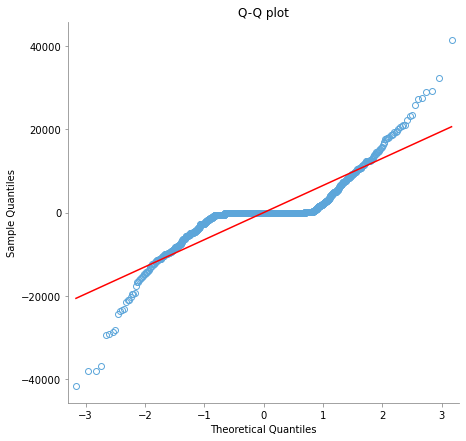

In [71]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    fig, ax = plt.subplots()
    plt.rc("figure", figsize=(7,7))
    sm.ProbPlot(model.resid).qqplot(line='s', marker='o', markerfacecolor='None', markeredgecolor= medium[1], ax=ax)
    ax.set_title('Q-Q plot')
    ax.spines["bottom"].set_color(light[0])
    ax.spines["left"].set_color(light[0])
    ax.xaxis.label.set_color(dark_bright[0])
    ax.yaxis.label.set_color(dark_bright[0])
    ax.title.set_color(dark_bright[0])
    ax.tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(results)

## Two of four assumptions do not hold

Heteroscedasticy and normality are not true for this dataset.

Therefore, the OLS model is potentially less reliable for inferential purposes.